# **1. 손글씨 데이터셋 살펴보기**

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
# 총 64개의 숫자 데이터가 들어가있다.
# len(digits['data'][0])
digits['data'][1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [10]:
data = digits['data']
data.shape

(1797, 64)

In [11]:
target = digits['target']
target.shape

(1797,)

In [12]:
target[0]

0

In [13]:
import matplotlib.pyplot as plt

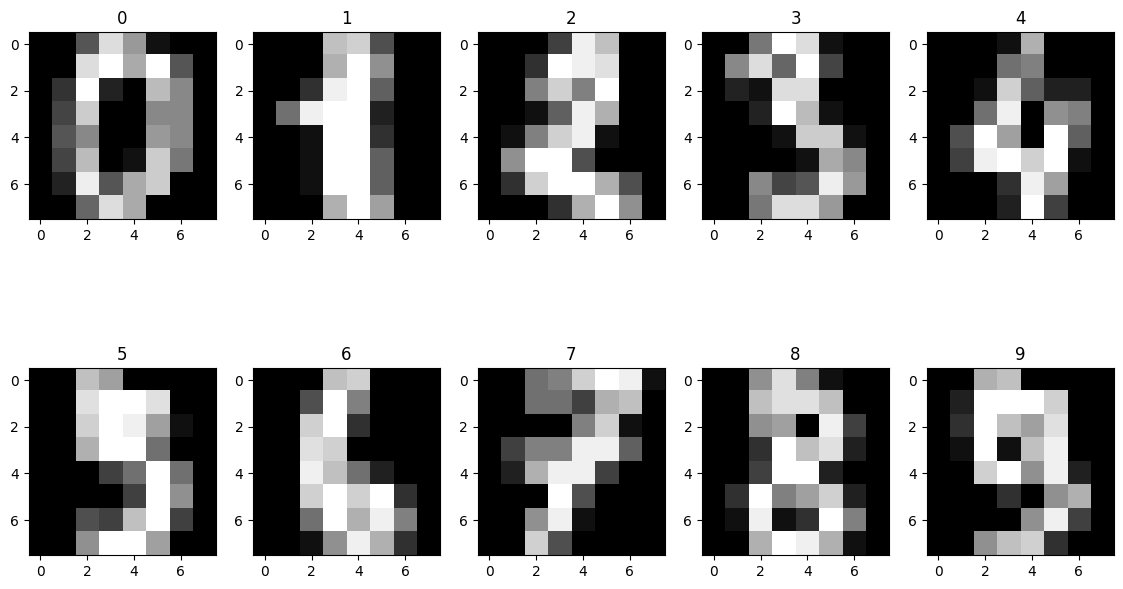

In [21]:
# fig : Figure 객체, axes : AxesSubplot 객체(2차원 배열)
fig, axes = plt.subplots(2, 5, figsize = (14, 8))

# print(axes)
# print(axes.flatten())

# enumerate 함수는 인덱스와 값을 함께 반환
for i, ax in enumerate(axes.flatten()):
  # 컬럼의 갯수가 64개이기 때문에!
  ax.imshow(data[i].reshape(8, 8), cmap = 'gray')
  ax.set_title(target[i])

# **2. 스케일링(Scaling)**
- 데이터를 특정한 스케일로 통일하는 것
- 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우나 언더플로우를 방지하여 최적화 과정에서의 안정성 및 수렴 속도를 향상
- 데이터를 모델링하기 전에 거치는 것이 좋음

```
오버플로우 : 숫자가 데이터 형식의 허용 범위를 초과할 때
언더플로우 : 허용범위 미달

모든 특성을 동일한 범위로 조정하여 알고리즘이 특성 간의 중요도를 올바르게 인식하도록 한다.
```

### 2-1. 스케일링의 종류
- StandardScaler : 평균과 표준편차를 사용 (표준화)
- MinMaxScaler : 최대, 최솟값이 각각 1과 0이 되도록 스케일링(정규화)
- RobustScaler : 중앙값과 IQR사용(아웃라이어의 영향을 최소화)

```
IQR : 1사분위수(25% 백분위수)와 3사분위수(75% 백분위수) 사이의 범위
IQR = Q3 - Q1

각 값에서 중앙값을 뺀다.
그리고 IQR을 사용하여 스케일 조정
```

In [22]:
import pandas as pd

In [23]:
baseball = {'nc' : [2, 4, 6, 8, 10], 'kt' : [1, 2, 3, 4, 5]}

In [24]:
baseball = pd.DataFrame(data = baseball)
baseball

,nc,kt
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [26]:
min_max_scaler = MinMaxScaler()

In [28]:
min_max_base = min_max_scaler.fit_transform(baseball)
min_max_base

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [29]:
standard = StandardScaler()

In [30]:
standard_base = standard.fit_transform(baseball)
standard_base

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

### 2-2. 정규화

In [31]:
scaler = MinMaxScaler()

In [32]:
scaled = scaler.fit_transform(data)
scaled[0]

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(scaled, target, test_size = 0.2, random_state = 49)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


# **3. Support Vector Machine(SVM)**

- 두 클래스로부터 최대한 멀리 떨어져 있는 경계를 찾는 분류기로 특정 조건을 만족하는 동시에 클래스를 분류하는 것을 목표로 함

<img src="https://i.imgur.com/l1NQNvD.png" width="700px">


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [37]:
model = SVC()

In [38]:
model.fit(X_train, y_train)

SVC()

In [39]:
pred = model.predict(X_test)

In [40]:
accuracy_score(y_test, pred)

0.9944444444444445

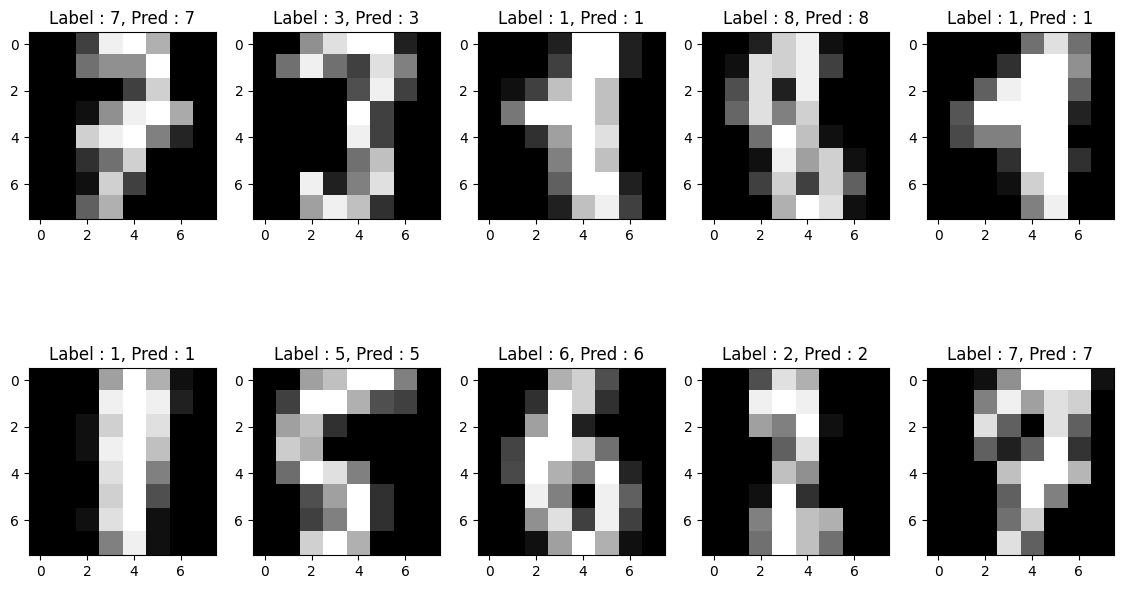

In [43]:
fig, axes = plt.subplots(2, 5, figsize = (14, 8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(X_test[i].reshape(8, 8), cmap = 'gray')
  ax.set_title(f'Label : {y_test[i]}, Pred : {pred[i]}')